## About Dataset
A transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

### Content

Data Set Characteristics: Multivariate, Sequential, Time-Series

Number of Instances: 541909

Area: Business

Attribute Characteristics: Integer, Real

Number of Attributes: 8

Date Donated: 2015-11-06

Associated Tasks: Classification, Clustering

Missing Values? N/A

Number of Web Hits: 159409

### Source

Dr Daqing Chen, Director: Public Analytics group. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK.

### Data Set Information:

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

### Attribute Information:

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 
StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. 
Description: Product (item) name. Nominal. 
Quantity: The quantities of each product (item) per transaction. Numeric. 
InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated. 
UnitPrice: Unit price. Numeric, Product price per unit in sterling. 
CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. 
Country: Country name. Nominal, the name of the country where each customer resides.

### Relevant Papers:

The evolution of direct, data and digital marketing, Richard Webber, Journal of Direct, Data and Digital Marketing Practice (2013) 14, 291â€“309. 
Clustering Experiments on Big Transaction Data for Market Segmentation, 
Ashishkumar Singh, Grace Rumantir, Annie South, Blair Bethwaite, Proceedings of the 2014 International Conference on Big Data Science and Computing. 
A decision-making framework for precision marketing, Zhen You, Yain-Whar Si, Defu Zhang, XiangXiang Zeng, Stephen C.H. Leung c, Tao Li, Expert Systems with Applications, 42 (2015) 3357â€“3367.

### Citation Request:

Daqing Chen, Sai Liang Sain, and Kun Guo, Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining, Journal of Database Marketing and Customer Strategy Management, Vol. 19, No. 3, pp. 197â€“208, 2012 (Published online before print: 27 August 2012. doi: 10.1057/dbm.2012.17).

### Inspiration

Your data will be in front of the world's largest data science community. What questions do you want to see answered?

### Link: https://www.kaggle.com/datasets/jihyeseo/online-retail-data-set-from-uci-ml-repo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from datetime import datetime

In [2]:
data = pd.read_excel('Online Retail.xlsx')

In [3]:
df = data.copy()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
n_rows = df.shape[0]
print(f'Rows number: {n_rows}')

Rows number: 541909


In [5]:
# Missing values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
# Deleting rows with missing data
df.dropna(inplace=True)

In [7]:
# Numerical statistics
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
# Filtering invalid values. Quantity can't be less than zero.
df = df[df['Quantity']>0]

In [9]:
# Checking data types
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [10]:
# Change customer ID from float to string
df.CustomerID = df.CustomerID.astype('str').str.split('.').apply(lambda x: x[0])

In [11]:
# Adding additional information for analysis
df['Amount'] = df.Quantity * df.UnitPrice
df['Date'] = df.InvoiceDate.dt.date
df['Hour'] = df.InvoiceDate.dt.hour
df['Year_month'] = df.Date.astype('str').str.split('-').apply(lambda x: '-'.join(map(str,x[:2])))

In [12]:
# All dates in data are from 2011 year except one month. Drop these dates from data.
df = df[df['Year_month']!= '2010-12']

In [13]:
# Unique values in every rows
cols = list(df.columns)
for col in cols:
    print(f'{col} column unique values: {df[col].nunique()}') 

InvoiceNo column unique values: 17136
StockCode column unique values: 3596
Description column unique values: 3784
Quantity column unique values: 295
InvoiceDate column unique values: 15993
UnitPrice column unique values: 429
CustomerID column unique values: 4220
Country column unique values: 36
Amount column unique values: 2859
Date column unique values: 285
Hour column unique values: 15
Year_month column unique values: 12


In [14]:
LTV_average = df.groupby('CustomerID', as_index=False).agg({'Amount':'sum'})\
                .sort_values('Amount', ascending=False).mean().Amount.round(2)
print(f'Average customer LTV: {LTV_average} GBP')

Average customer LTV: 1975.99 GBP


In [15]:
max_invoice_amount = df.groupby('InvoiceNo', as_index=False)\
                       .agg({'Amount':'sum'})\
                       .sort_values('Amount', ascending=False)\
                       .max().Amount
max_invoice_amount
print(f'Maximal invoice amount: {max_invoice_amount} GBP')

Maximal invoice amount: 168469.6 GBP


In [16]:
mean_invoice_amount = df.groupby('InvoiceNo', as_index=False)\
                       .agg({'Amount':'sum'})\
                       .sort_values('Amount', ascending=False)\
                       .mean().Amount.round(2)
max_invoice_amount
print(f'Mean invoice amount: {mean_invoice_amount} GBP')

Mean invoice amount: 486.62 GBP


In [17]:
most_purchased = df.groupby('StockCode', as_index=False)\
                   .agg({'Quantity':'sum'})\
                   .sort_values('Quantity', ascending=False)
desc = df[df.StockCode == most_purchased.StockCode.values[0]].Description.values[0]
quant = most_purchased.Quantity.values[0]
print(f'Top selling item: {desc} ({quant} times sold)')

Top selling item: PAPER CRAFT , LITTLE BIRDIE (80995 times sold)


In [18]:
most_profitable = df.groupby('Description', as_index=False)\
                  .agg({'Amount':'sum'})\
                  .sort_values('Amount', ascending=False).head(1)
desc = most_profitable.Description.values[0]
amount = most_profitable.Amount.values[0]
print(f'Most profitable item: {desc} ({amount} GBP income)')

Most profitable item: PAPER CRAFT , LITTLE BIRDIE (168469.6 GBP income)


In [19]:
max_revenue_day = df.groupby('Date', as_index=False)\
                    .agg({'Amount':'sum'})\
                    .sort_values('Amount', ascending=False).head(1)
dt = str(max_revenue_day.Date.values[0])
am = max_revenue_day.Amount.values[0]
print(f'Maximal daily revenue: {am} GBP ({dt})')

Maximal daily revenue: 184349.28 GBP (2011-12-09)


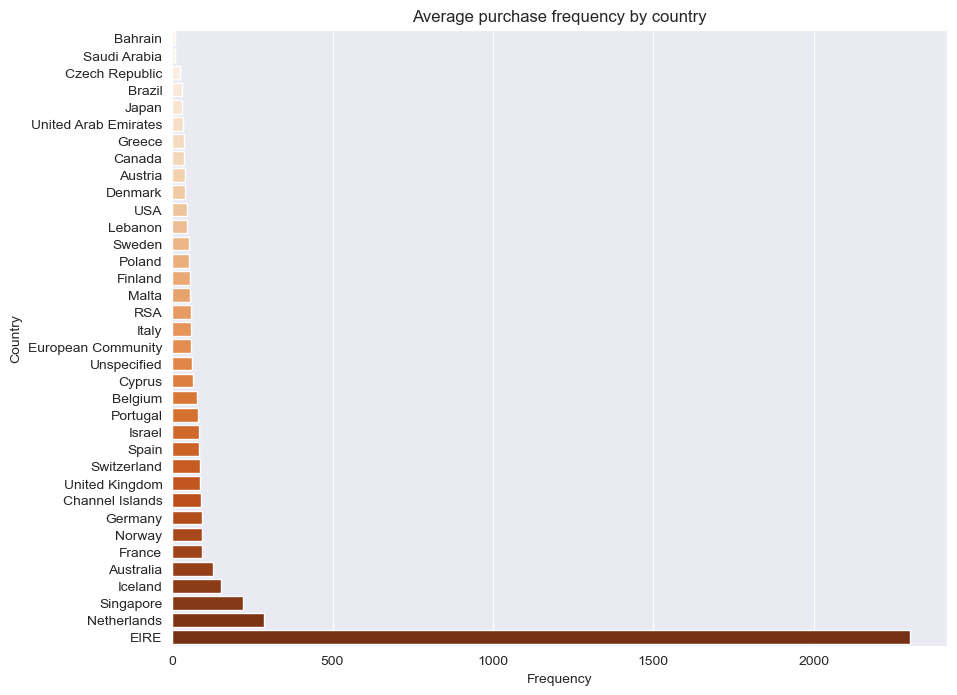

In [20]:
# Purchase frequency by country
mean_purchase_frequency = df.groupby(['Country','CustomerID'], as_index=False)\
                       .agg({'InvoiceNo':'count'})\
                       .rename(columns={'InvoiceNo':'Frequency'})\
                       .groupby('Country', as_index=False).agg({'Frequency':'mean'}).sort_values('Frequency')

plt.figure(figsize = (10,8))
sns.barplot(y = mean_purchase_frequency.Country, x = mean_purchase_frequency.Frequency, palette='Oranges')
plt.title('Average purchase frequency by country')
plt.show()

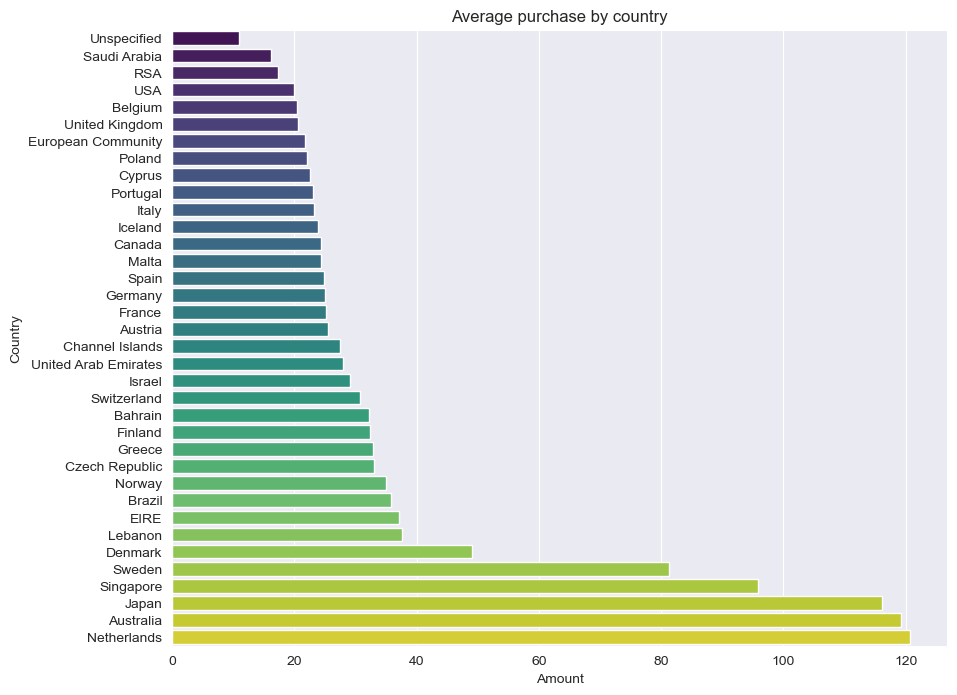

In [21]:
# Average purchase by country
countries_mean_purchases = df.groupby('Country', as_index=False)\
                            .agg({'Amount':'mean'})\
                            .sort_values('Amount')
plt.figure(figsize = (10,8))
sns.barplot(y = countries_mean_purchases.Country, x = countries_mean_purchases.Amount, palette='viridis')
plt.title('Average purchase by country')
plt.show()

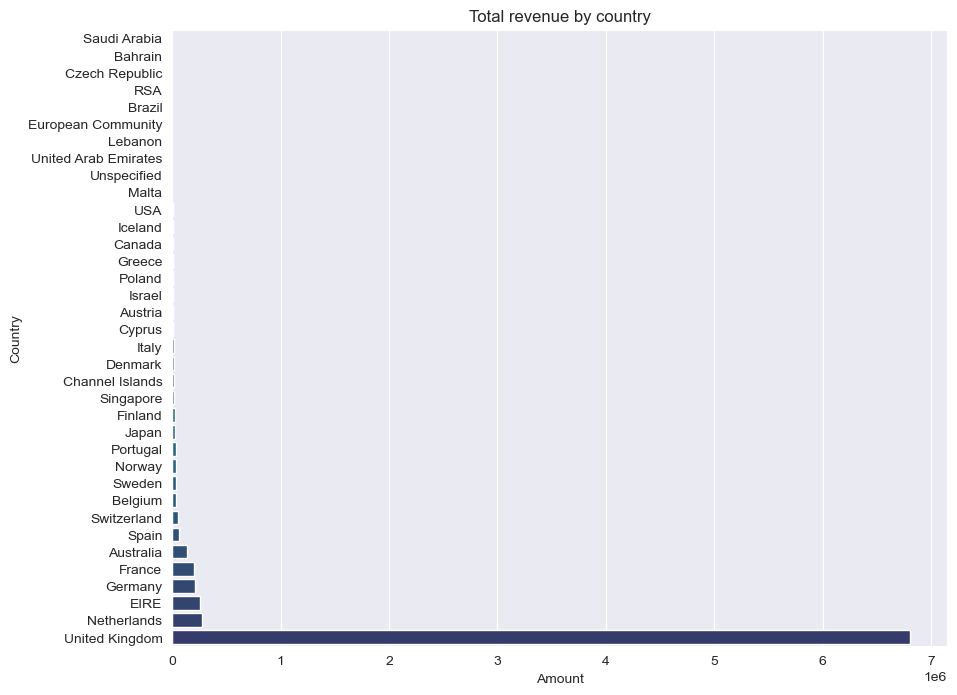

In [22]:
# Total revenue by country
countries_total_revenue = df.groupby('Country', as_index=False)\
                            .agg({'Amount':'sum'})\
                            .sort_values('Amount')
plt.figure(figsize = (10,8))
sns.barplot(y = countries_total_revenue.Country, x = countries_total_revenue.Amount, palette='crest')
plt.title('Total revenue by country')
plt.show()

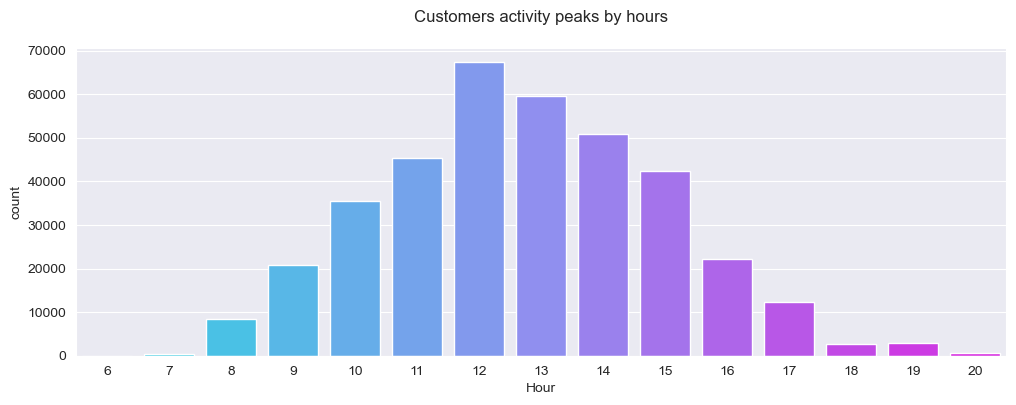

In [23]:
# Customers activity peaks
plt.figure(figsize=(12,4))
sns.countplot(x = df.Hour, palette='cool')
plt.title('Customers activity peaks by hours\n')
plt.show()

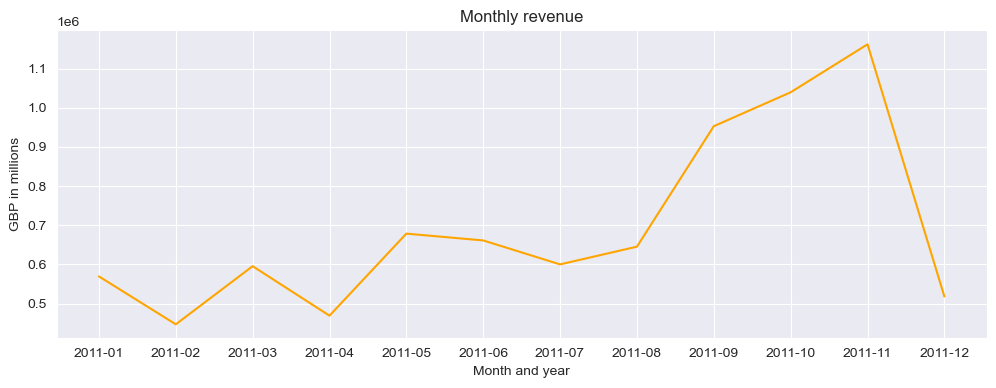

In [24]:
# Monthly revenue
revenue_by_date = df.groupby('Year_month', as_index=False).agg({'Amount':'sum'})
plt.figure(figsize = (12,4))
sns.lineplot(x = revenue_by_date.Year_month, y = revenue_by_date.Amount, color = 'orange')
plt.title('Monthly revenue')
plt.ylabel('GBP in millions')
plt.xlabel('Month and year')
plt.show()

### Analytics report:

* Average customer LTV: 1975.99 GBP

* Maximal invoice amount: 168469.6 GBP

* Mean invoice amount: 486.62 GBP

* Maximal daily revenue: 184349.28 GBP (2011-12-09)

* Top selling item: PAPER CRAFT , LITTLE BIRDIE (80995 times sold).

* Most profitable item: PAPER CRAFT , LITTLE BIRDIE (168469.6 GBP income). 

* Customers from Netherlands have the biggest average purchase.

* Customers from UK spent total at least 7 times more than any other country customers.

* Customers from EIRE have maximum purchase frequency.

* Customers activity peak usually happens at 12.00.

* Maximal monthly revenue was in November 2011 (over 1.1 million GBP).



# RFM analysis

In [25]:
# Creating new dataframe for RFM analysis
RFM_data = df.groupby('CustomerID', as_index=False)\
             .agg({'InvoiceNo':'count','Amount':'sum','InvoiceDate':'max'})
RFM_data['InvoiceDate'] = RFM_data.InvoiceDate.dt.date
today = '2012-01-01'
RFM_data['Recency'] = (pd.to_datetime(today) - pd.to_datetime(RFM_data.InvoiceDate))/np.timedelta64 ( 1 , 'D')
RFM_data.head()

,CustomerID,InvoiceNo,Amount,InvoiceDate,Recency
0,12346,1,77183.60,2011-01-18,348.0
1,12347,151,3598.21,2011-12-07,25.0
2,12348,14,904.44,2011-09-25,98.0
3,12349,73,1757.55,2011-11-21,41.0
4,12350,17,334.40,2011-02-02,333.0


In [26]:
# Counting quantiles 0.33 and 0.66 in Recency, Frequency and Money
quantile_33r = RFM_data.Recency.quantile(0.33)
quantile_66r = RFM_data.Recency.quantile(0.66)
quantile_33f = RFM_data.InvoiceNo.quantile(0.33)
quantile_66f = RFM_data.InvoiceNo.quantile(0.66)
quantile_33m = RFM_data.Amount.quantile(0.33)
quantile_66m = RFM_data.Amount.quantile(0.66)

In [27]:
# Functions for splitting groups
def splitting_r(n):
    if 0 <= n < quantile_33r:
        return 3
    elif quantile_33r <= n < quantile_66r:
        return 2
    elif n >= quantile_66r:
        return 1
    
def splitting_f(n):
    if 0 <= n < quantile_33f:
        return 1
    elif quantile_33f <= n < quantile_66f:
        return 2
    elif n >= quantile_66f:
        return 3
    
def splitting_m(n):
    if 0 <= n < quantile_33m:
        return 1
    elif quantile_33m <= n < quantile_66m:
        return 2
    elif n >= quantile_66m:
        return 3

In [28]:
# New columns with splitted data
RFM_data['R'] = RFM_data.Recency.apply(splitting_r)
RFM_data['F'] = RFM_data.InvoiceNo.apply(splitting_f)
RFM_data['M'] = RFM_data.Amount.apply(splitting_m)

In [29]:
# Adding RFM scores column
RFM_data['RFM'] = RFM_data['R'] * 100 + RFM_data['F'] * 10 + RFM_data['M']
RFM_data.head()

,CustomerID,InvoiceNo,Amount,InvoiceDate,Recency,R,F,M,RFM
0,12346,1,77183.60,2011-01-18,348.0,1,1,3,113
1,12347,151,3598.21,2011-12-07,25.0,3,3,3,333
2,12348,14,904.44,2011-09-25,98.0,2,1,2,212
3,12349,73,1757.55,2011-11-21,41.0,3,3,3,333
4,12350,17,334.40,2011-02-02,333.0,1,1,1,111


In [30]:
# Split customers to score groups
RFM_scores = RFM_data.groupby('RFM', as_index=False)\
                     .agg({'CustomerID':'count'})\
                     .rename(columns={'CustomerID':'Customers_count'})
RFM_scores.head()

,RFM,Customers_count
0,111,609
1,112,136
2,113,30
3,121,137
4,122,291


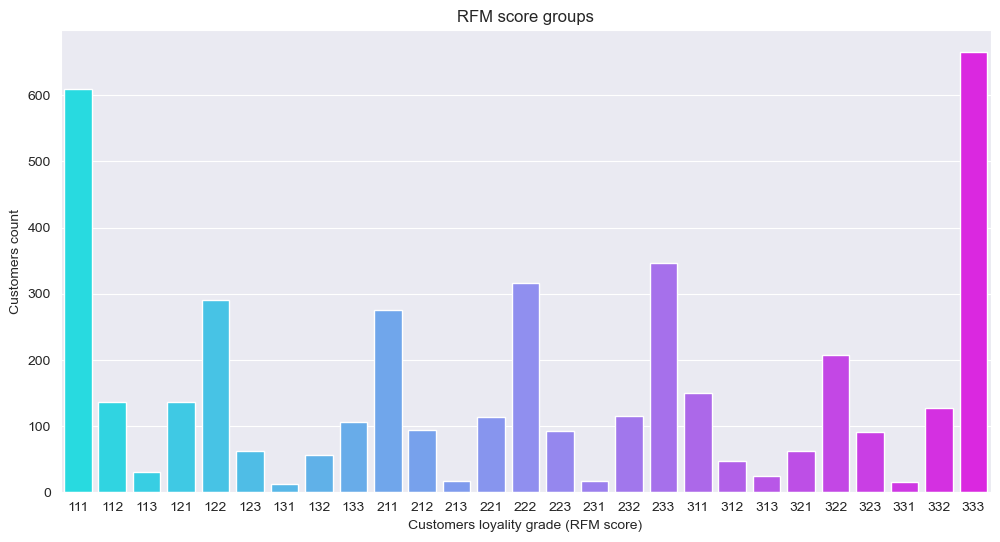

In [31]:
# RFM score groups
plt.figure(figsize = (12,6))
sns.barplot(x = RFM_scores.RFM, y = RFM_scores.Customers_count, palette='cool')
plt.xlabel('Customers loyality grade (RFM score)')
plt.ylabel('Customers count')
plt.title('RFM score groups')
plt.show()